# Scientific Programming Final Project

## Using function to read csv file

In [3]:
import pandas as pd #import pandas library 

def read_csv(file): #function that reads a csv file using pandas
    data =  pd.read_csv(file)
    return data


In [4]:
cars = read_csv('cars_dataset.csv') #read the csv file by calling the function read_csv
cars.info() #get general information from each column in the dataset (datatypes, and number of non-nulls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [5]:
cars.head() #show first 5 rows of dataframe

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


## Descriptive Statistics

In [12]:
#get only quantitative attributes in a dataframe
num_col = []
for col in cars: #add in a list all the column names where data type is different than 'object'
    if cars[col].dtypes != 'object':
        num_col.append(cars[col].name)
    else:
        pass #ignore if the condition is not met 
quant_cars = cars[num_col]
quant_cars.describe() #get descriptive statistics of the numerical attrbutes 

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


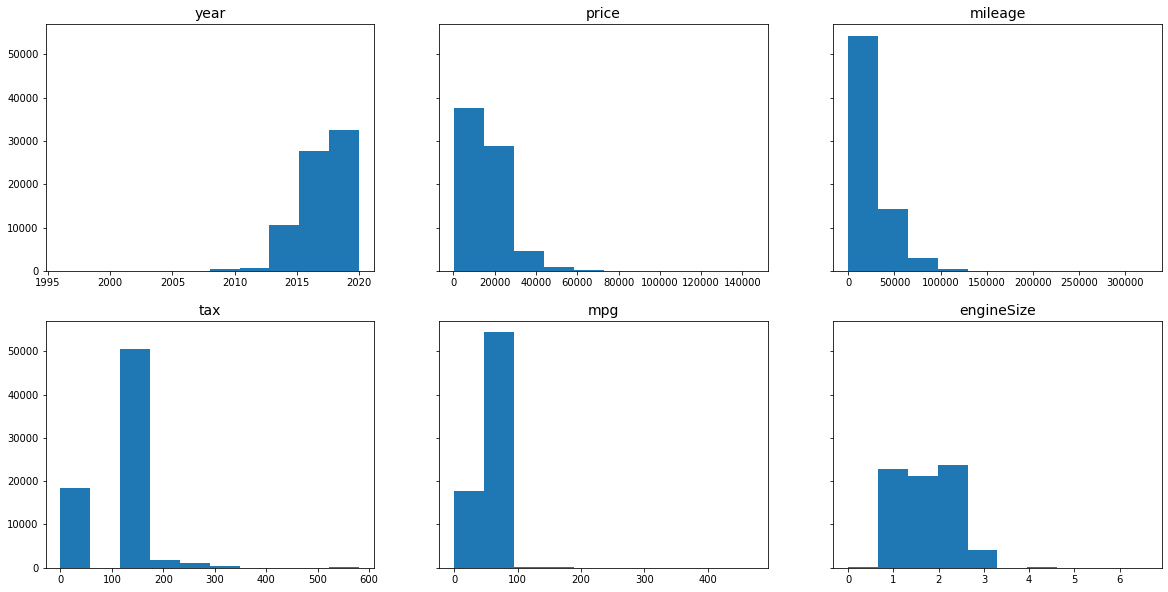

In [5]:
import matplotlib.pyplot as plt #import matplotlib library 


row = 2
col = 3
x,y,z =0,0,0
#define a figure with 2*3 subplots, specify de gifure size for each subplot
fig, ax= plt.subplots(row,col, figsize=(20,10), sharex=False,sharey='row')

while x<row: #fill each subplot with quantitative data of the dataset 
    while y<col:
        ax[x,y].hist(quant_cars.iloc[:,z]) #create histogram for each column in quant_cars
        ax[x,y].set_title(quant_cars.iloc[:,z].name, fontsize = 14) #assign title of subplot based on attribute
        y+=1
        z+=1
    y=0
    x+=1

## Qualitative analysis

In [20]:
#get only qualitative attributes in a dataframe
qual_cars = [col for col in cars.columns if col not in quant_cars]
qual_cars = cars[qual_cars]
qual_cars.describe() #get ddescription of the qualitative attributes

,model,transmission,fuelType,Make
count,72435,72435,72435,72435
unique,146,4,5,7
top,Fiesta,Manual,Petrol,Ford
freq,6556,43021,40370,17964


In [7]:
qual_cars.groupby('Make').count()
qual_cars['Make'].value_counts()

Ford       17964
vw         15157
BMW        10781
audi       10668
toyota      6738
skoda       6267
Hyundai     4860
Name: Make, dtype: int64

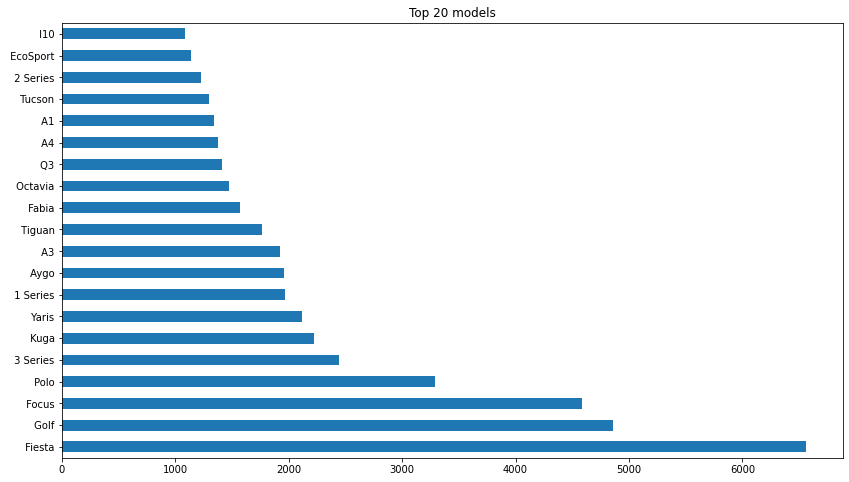

In [8]:
ax = qual_cars['model'].value_counts()[:20].plot(kind='barh',
                                    figsize=(14,8),
                                    title="Top 20 models")



<AxesSubplot:title={'center':'Manufacturer'}>

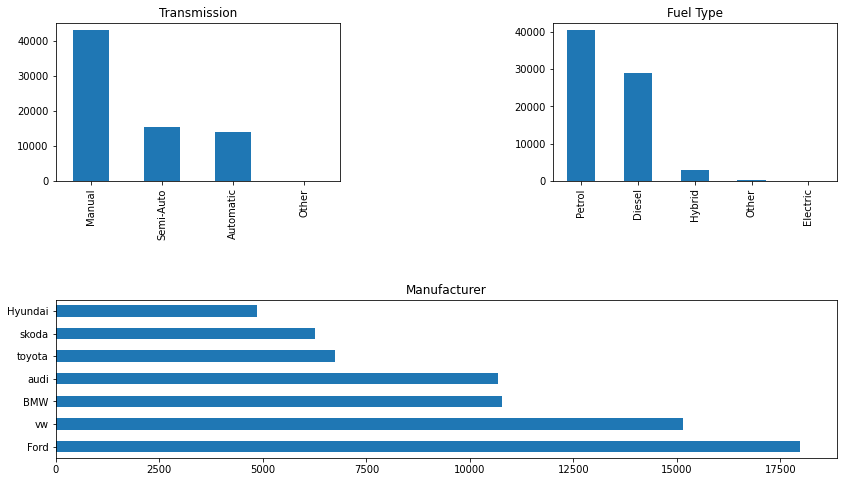

In [9]:

fig = plt.figure(figsize=(9, 6))

plt.subplots_adjust(wspace= 0.75, hspace= 0.75)

sub1 = fig.add_subplot(2,2,1) # two rows, two columns, fist cell
qual_cars['transmission'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Transmission")

sub2 = fig.add_subplot(2,2,2) # two rows, two columns, second cell
qual_cars['fuelType'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Fuel Type")

# Create third axes, a combination of third and fourth cell
sub3 = fig.add_subplot(2,2,(3,4)) # two rows, two colums, combined third and fourth cell
qual_cars['Make'].value_counts().plot(kind='barh',
                                    figsize=(14,8),
                                    title="Manufacturer")


## Correlation matrix

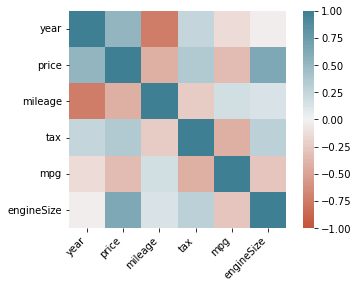

In [22]:
import seaborn as sns #import seaborn library 

corr = quant_cars.corr() #get correlation matrix for quantitative attributes 
ax = sns.heatmap( #plot a heatmap using seaborn 
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

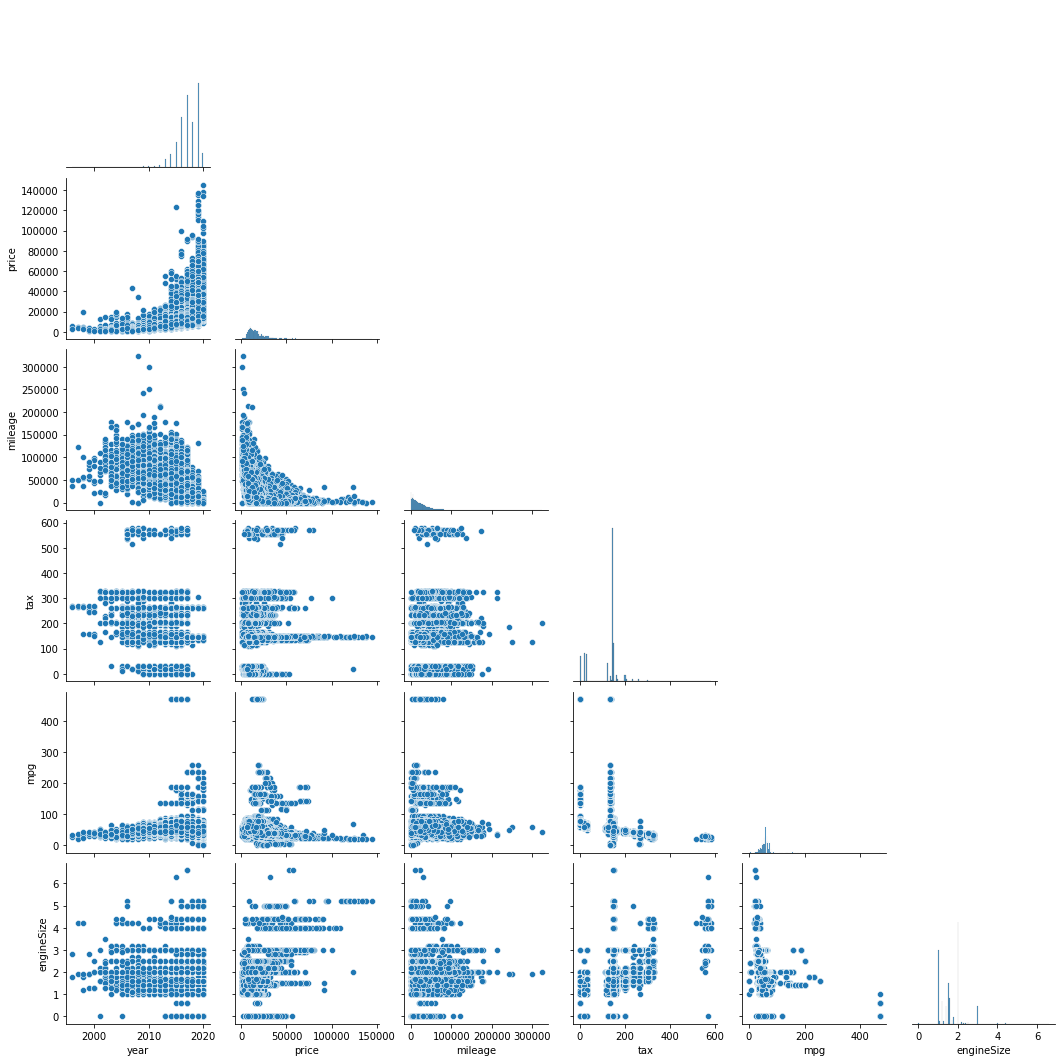

In [28]:
# Relationships between numerical features
sns.pairplot(quant_cars, corner=True)